# YOLOv8 Medium - PCB 결함 검사

## 1. 학습 환경

| 항목 | 설정 |
|------|------|
| 플랫폼 | Google Colab |
| GPU | Tesla T4 (14.7GB) |
| 모델 | YOLOv8m |
| 데이터 | PCB 결함 이미지 693장 |
| 학습/검증 | 552 / 141 |

## 2. 하이퍼파라미터

| 파라미터 | 값 |
|---------|-----|
| Epochs | 50 |
| Batch Size | 16 |
| Image Size | 416x416 |
| Optimizer | AdamW (lr=0.001) |
| Patience | 10 (Early Stopping) |

In [1]:
import os
import pandas as pd

RESULTS_PATH = './results/yolov8m_pcb'

# CSV 로드
results_csv = pd.read_csv(os.path.join(RESULTS_PATH, 'results.csv'))

# 최고 성능 epoch 찾기 (mAP50 기준)
best_idx = results_csv['metrics/mAP50(B)'].idxmax()
best_results = results_csv.iloc[best_idx]

# 최종 성능 지표
print("3. 학습 결과")
print("\n최종 성능 지표:")
print("-" * 60)
print(f"  mAP50      : {best_results['metrics/mAP50(B)']:.3f} ({best_results['metrics/mAP50(B)']*100:.1f}%)")
print(f"  mAP50-95   : {best_results['metrics/mAP50-95(B)']:.3f} ({best_results['metrics/mAP50-95(B)']*100:.1f}%)")
print(f"  Precision  : {best_results['metrics/precision(B)']:.3f} ({best_results['metrics/precision(B)']*100:.1f}%)")
print(f"  Recall     : {best_results['metrics/recall(B)']:.3f} ({best_results['metrics/recall(B)']*100:.1f}%)")
print(f"  Best Epoch : {int(best_results['epoch'])}")
print(f"  학습 시간   : 10분")
print(f"  모델 크기   : 52.0MB")

# 클래스별 성능 (Validation 로그 기준)
print("\n클래스별 성능:")
print("-" * 60)
class_results = {
    'Class': ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper'],
    'Precision': [0.962, 0.954, 0.962, 0.934, 0.909, 0.901],
    'Recall': [0.990, 0.778, 0.731, 0.962, 0.714, 0.783],
    'mAP50': [0.966, 0.888, 0.933, 0.956, 0.792, 0.883]
}
df_class = pd.DataFrame(class_results)
print(df_class.to_string(index=False))

3. 학습 결과

최종 성능 지표:
------------------------------------------------------------
  mAP50      : 0.903 (90.3%)
  mAP50-95   : 0.432 (43.2%)
  Precision  : 0.939 (93.9%)
  Recall     : 0.825 (82.5%)
  Best Epoch : 49
  학습 시간   : 10분
  모델 크기   : 52.0MB

클래스별 성능:
------------------------------------------------------------
          Class  Precision  Recall  mAP50
   Missing_hole      0.962   0.990  0.966
     Mouse_bite      0.954   0.778  0.888
   Open_circuit      0.962   0.731  0.933
          Short      0.934   0.962  0.956
           Spur      0.909   0.714  0.792
Spurious_copper      0.901   0.783  0.883



학습 곡선:


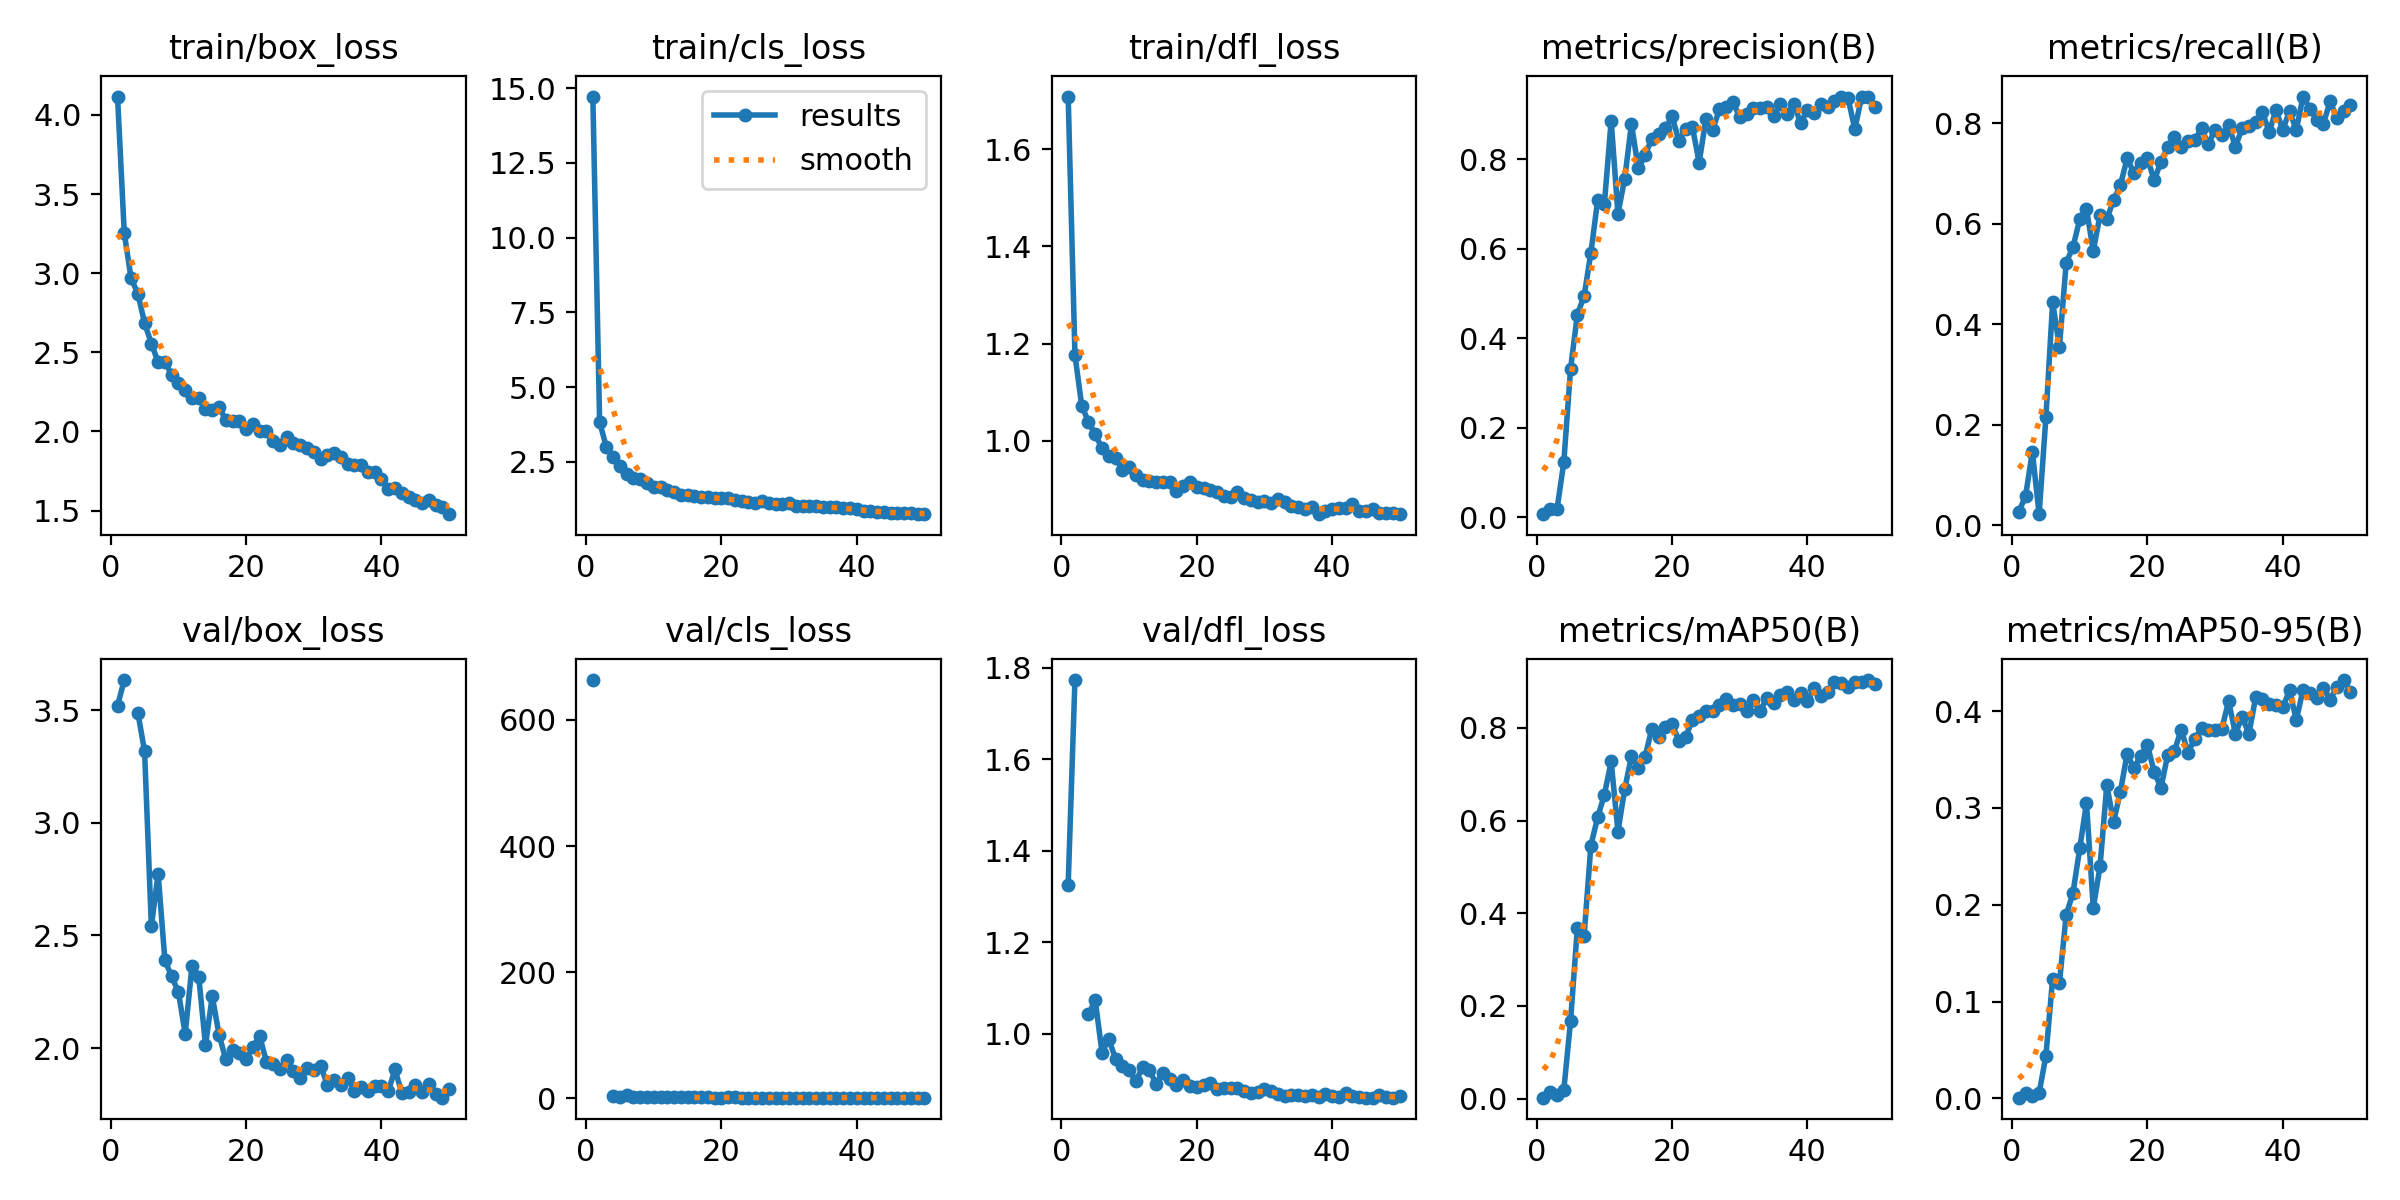


Confusion Matrix:


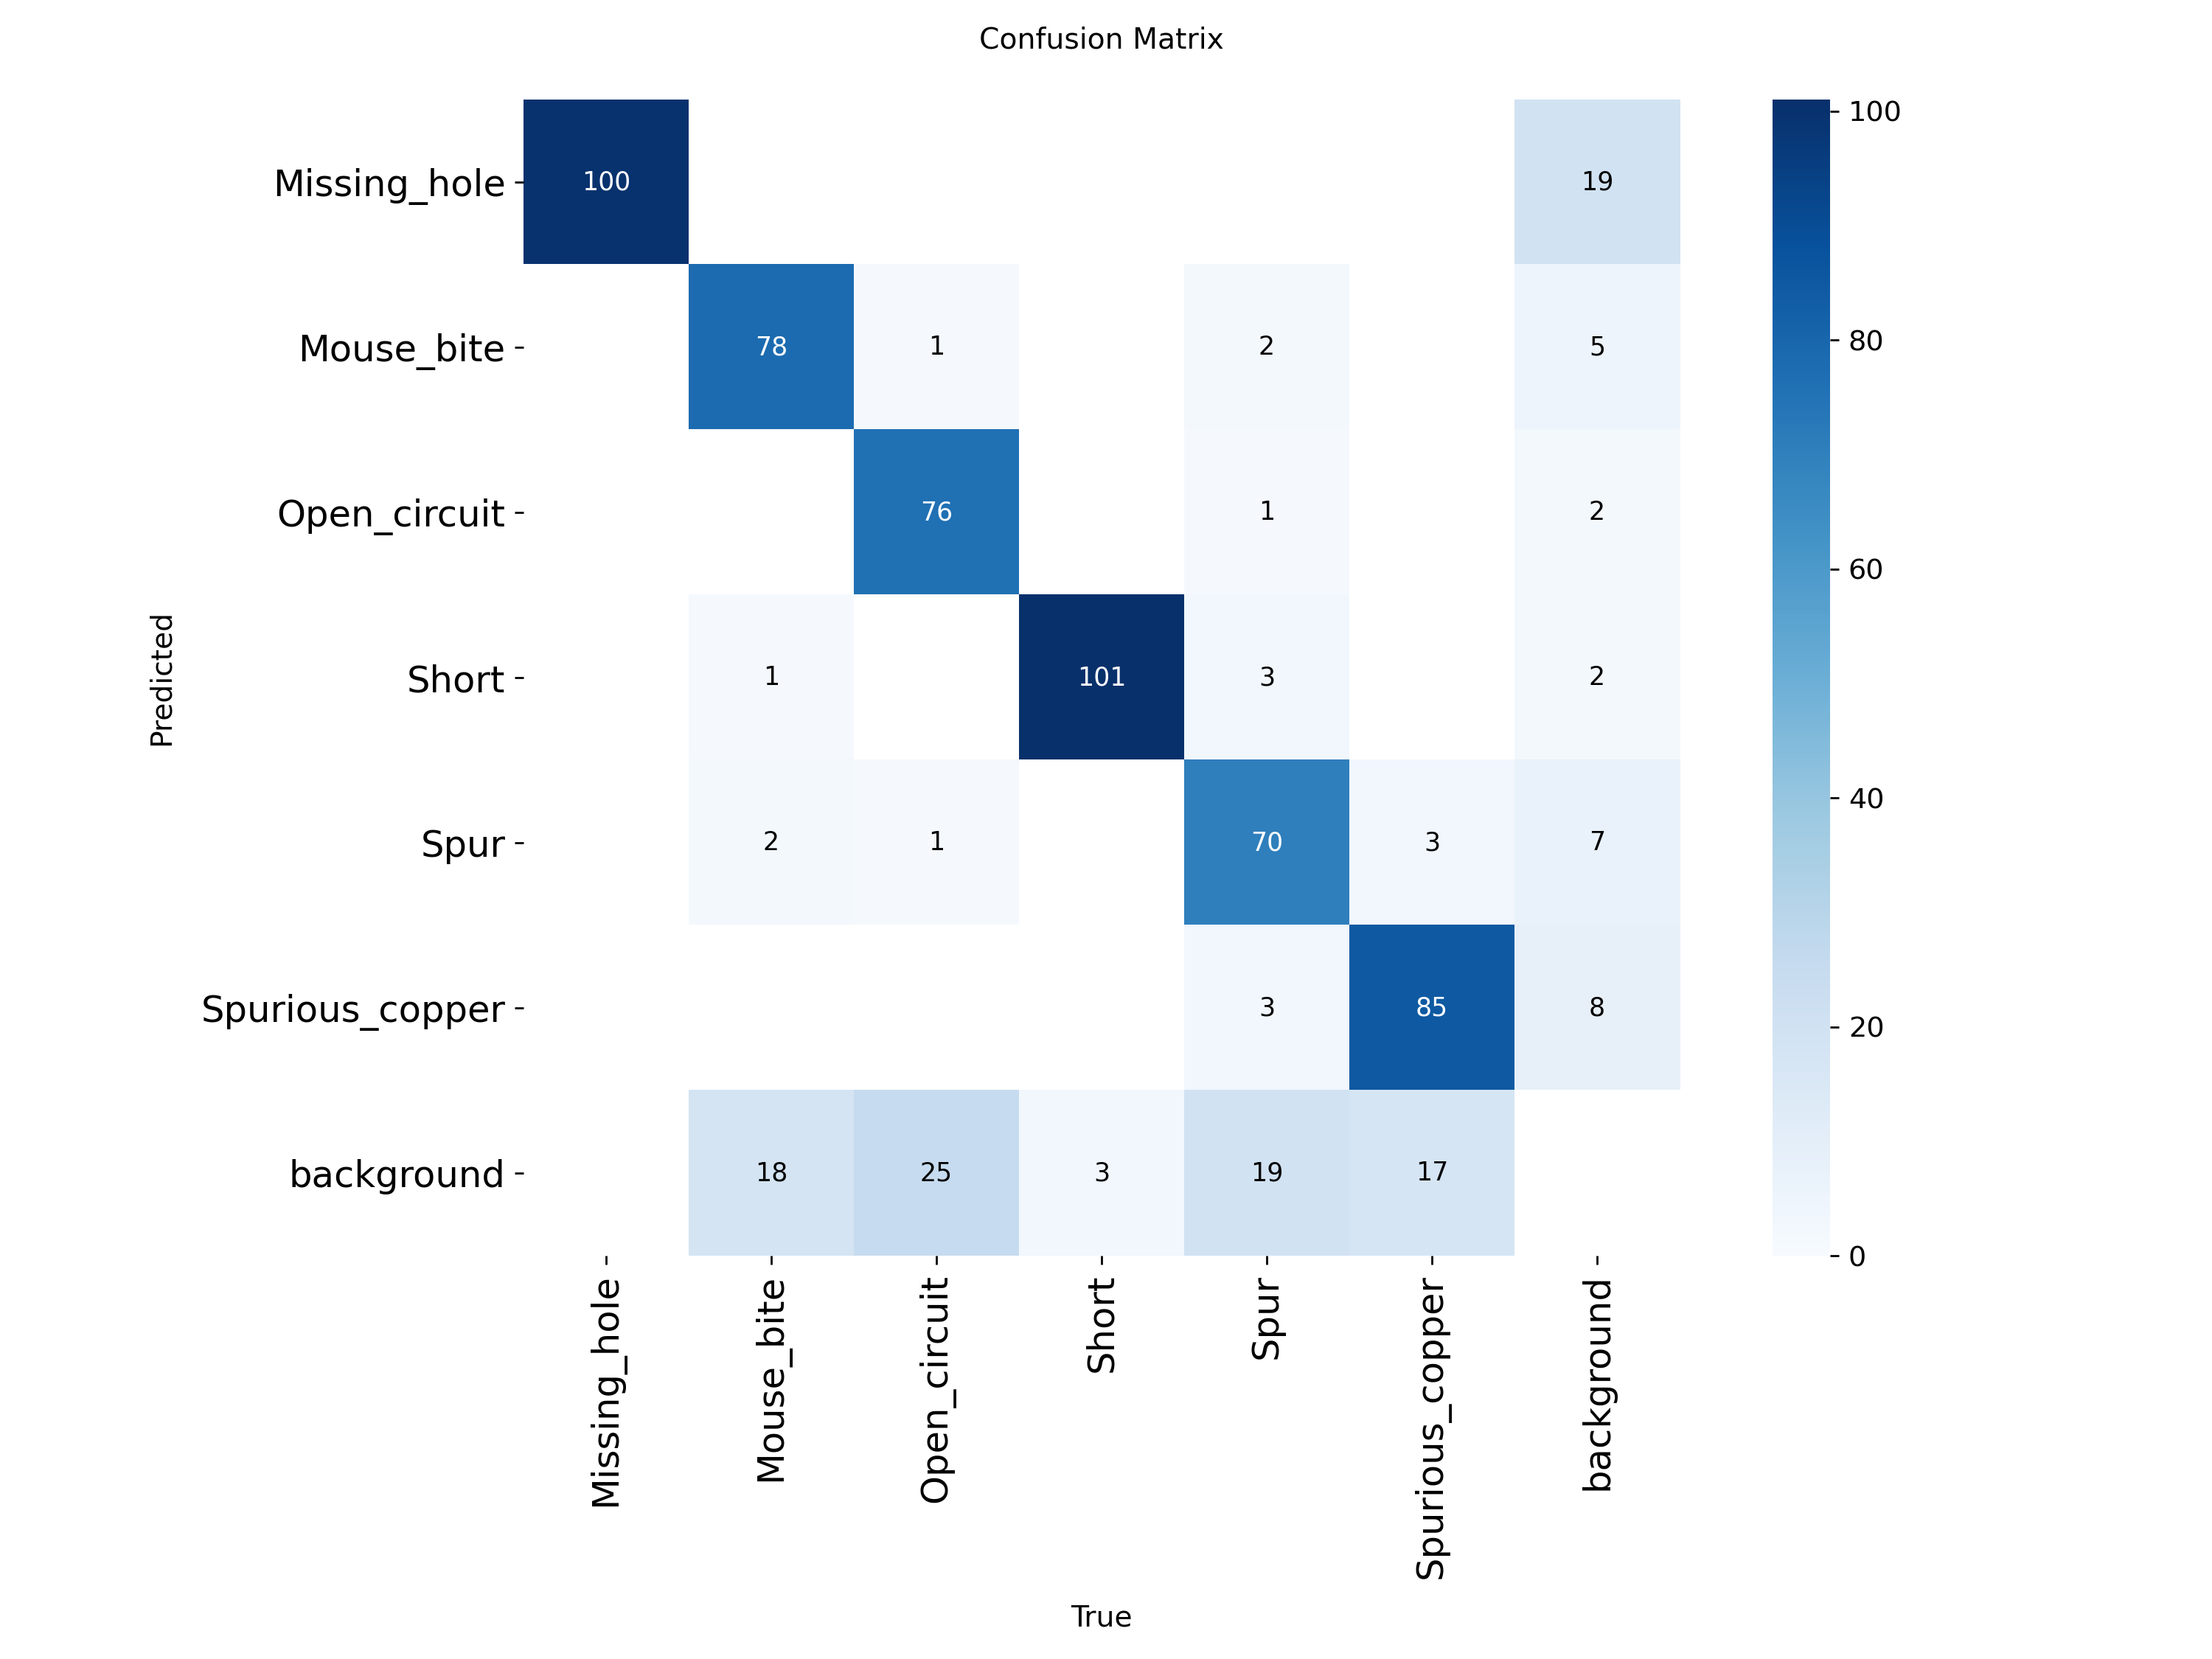


Precision-Recall 곡선:


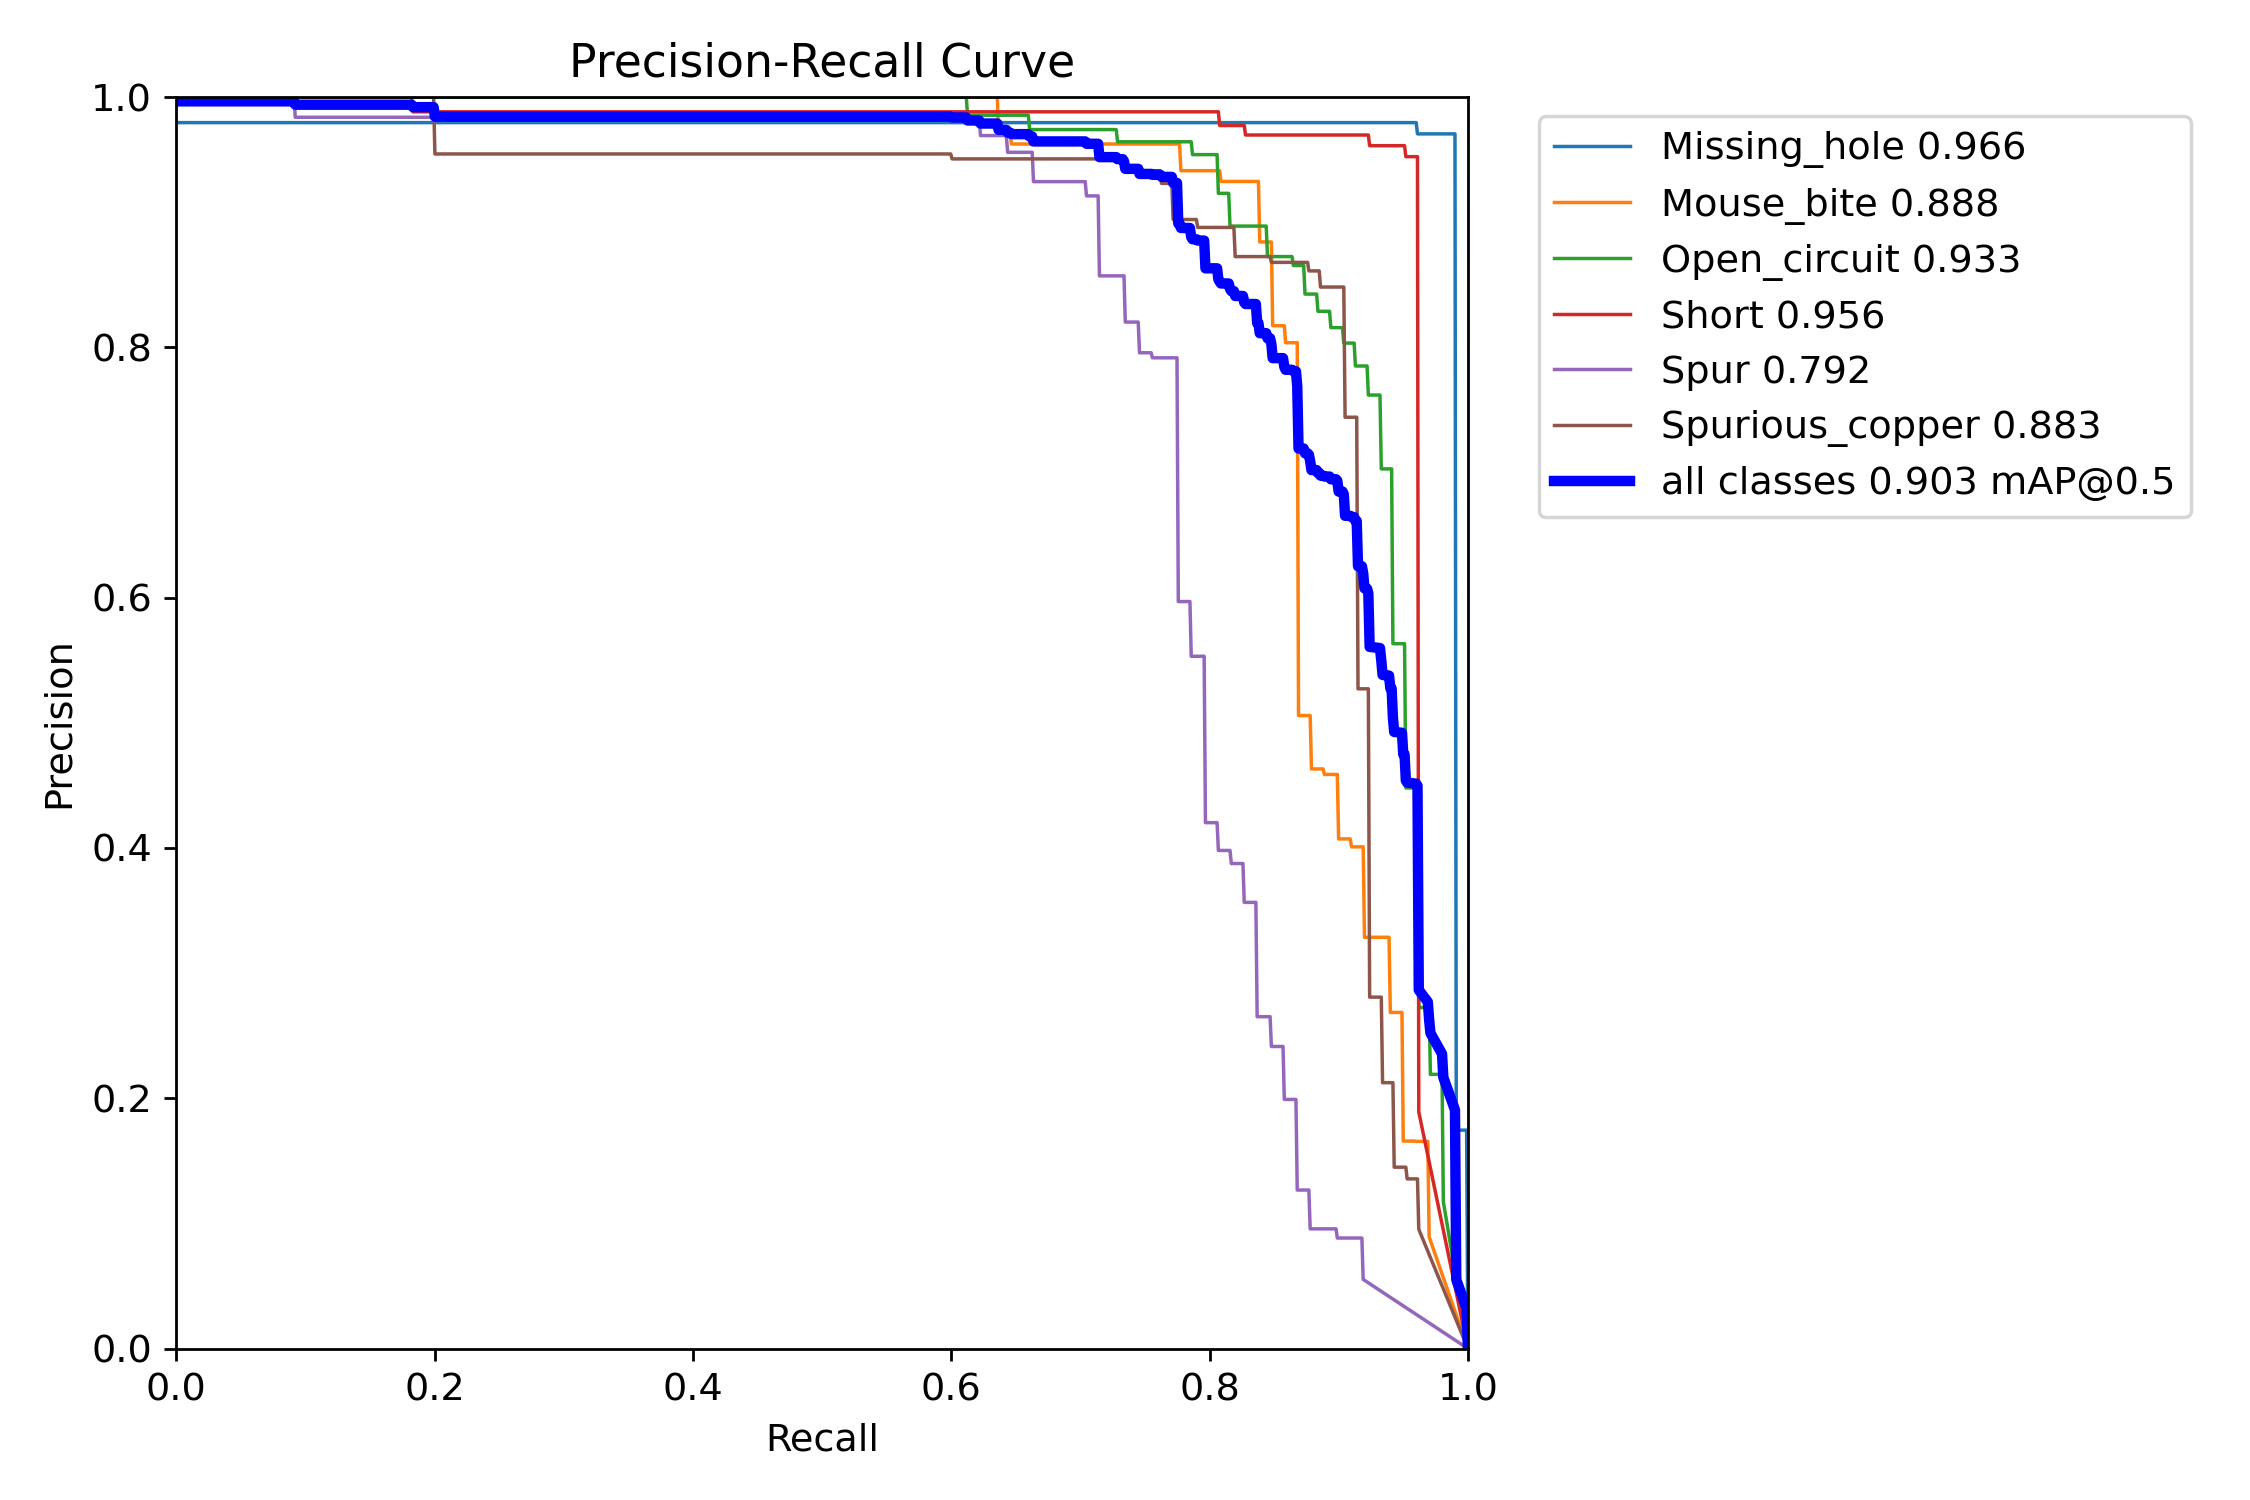


검증 결과 샘플:
Ground Truth:


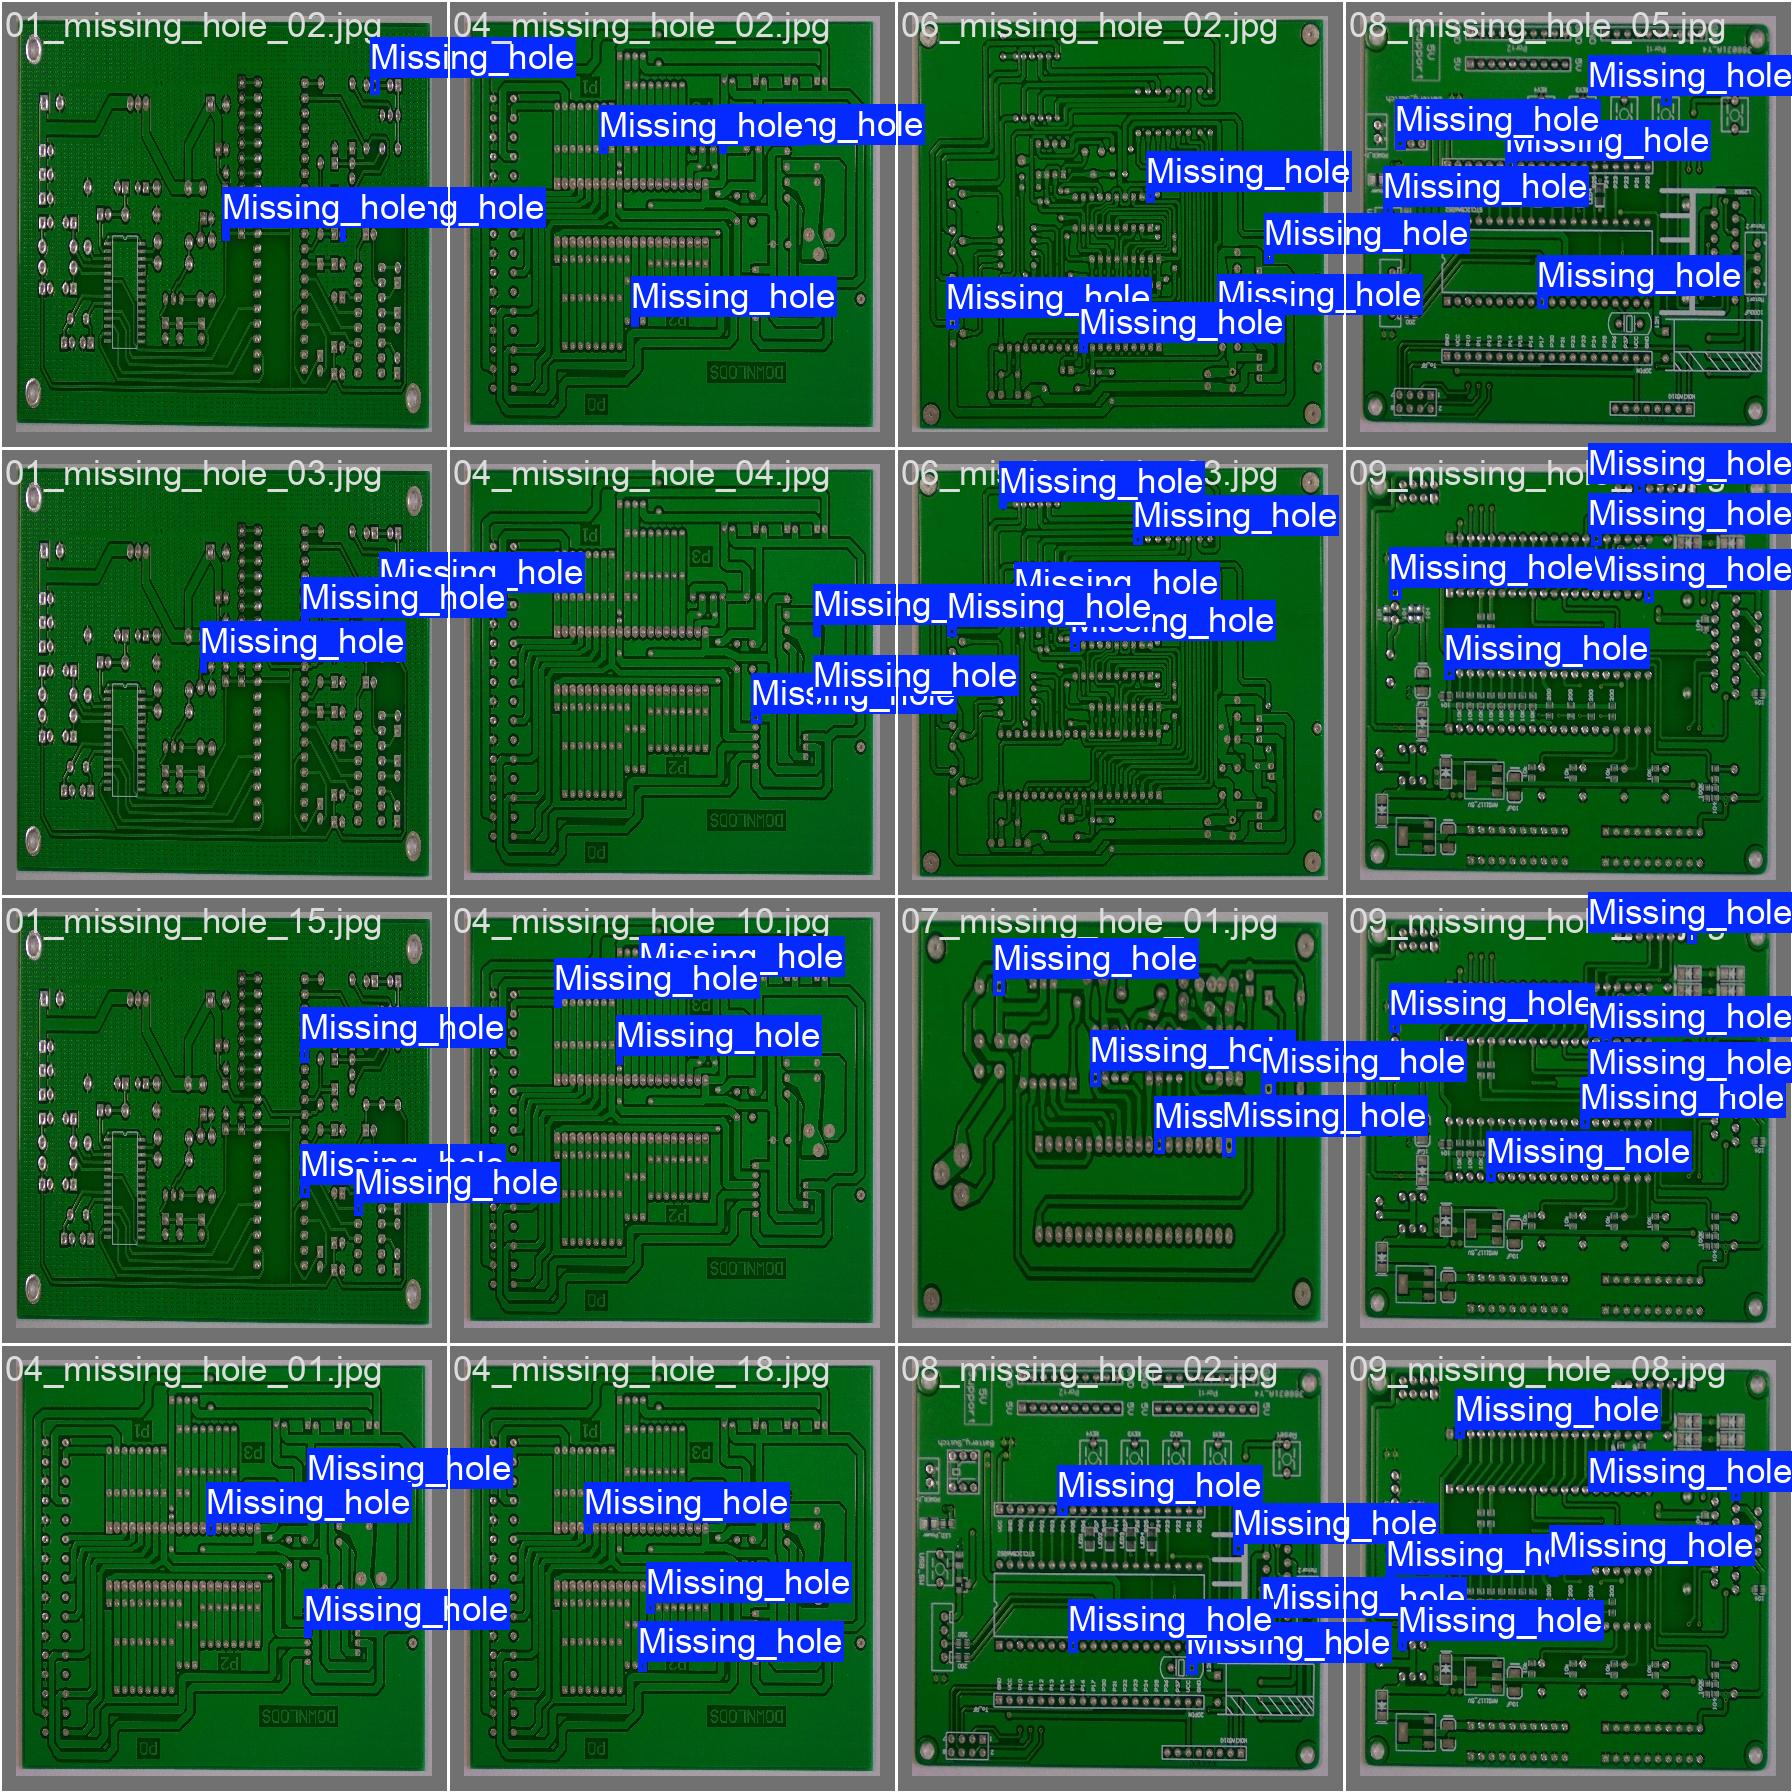


Prediction:


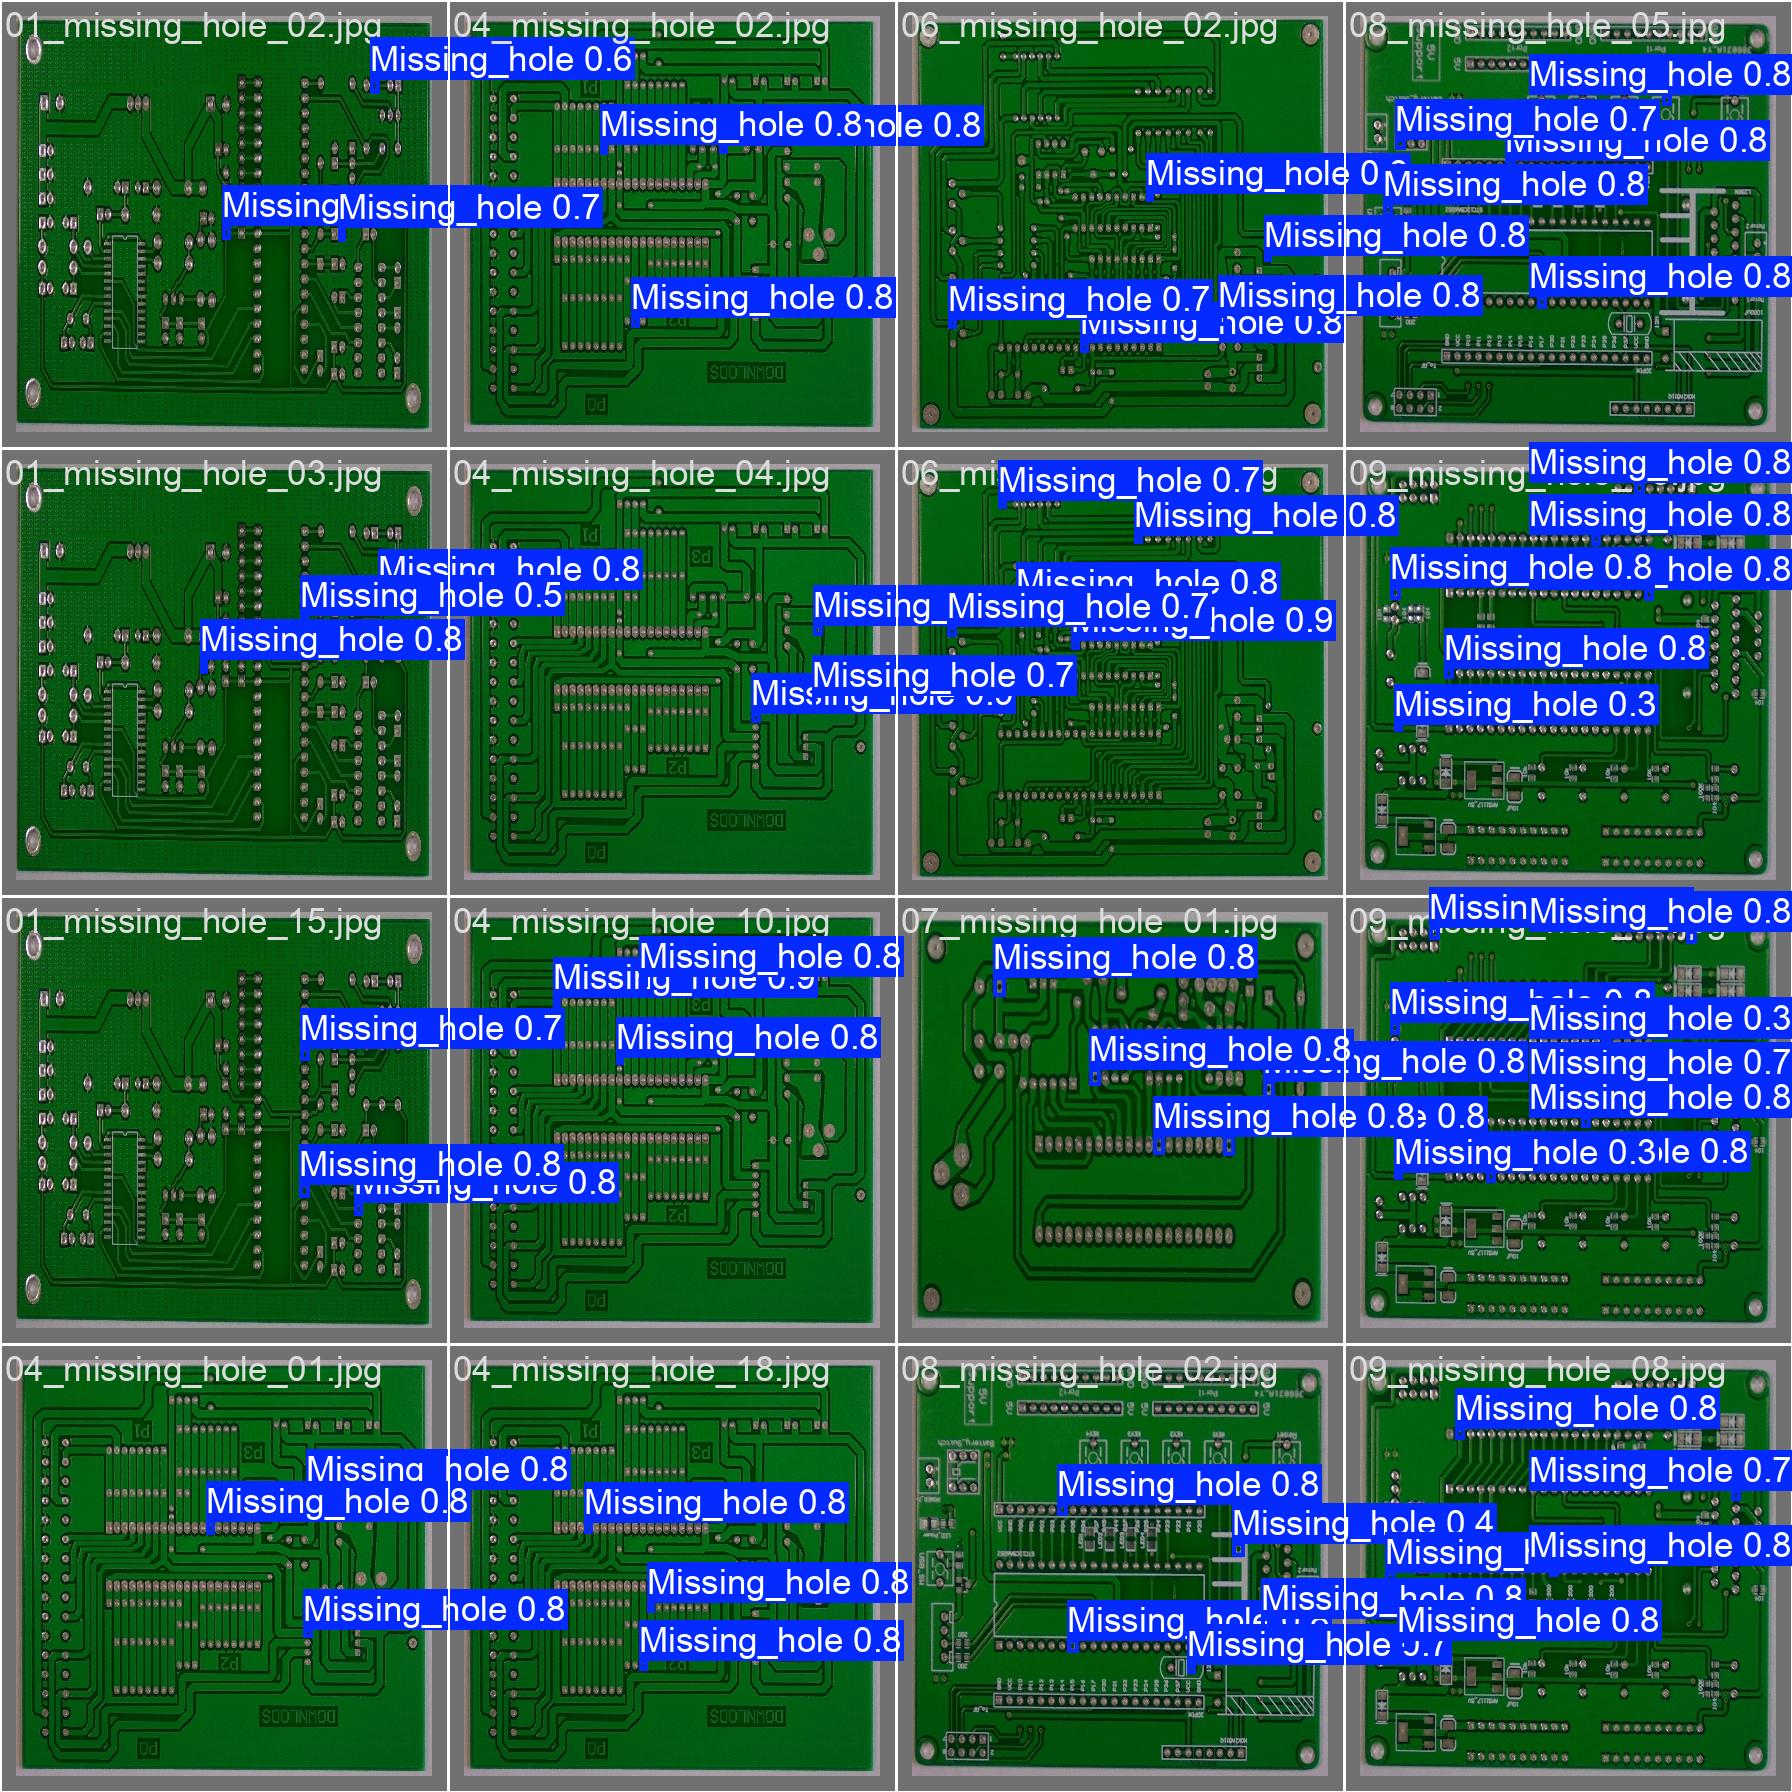

In [2]:
from IPython.display import Image

# 학습 곡선
print("\n학습 곡선:")
display(Image(os.path.join(RESULTS_PATH, 'results.png')))

print("\nConfusion Matrix:")
display(Image(os.path.join(RESULTS_PATH, 'confusion_matrix.png')))

print("\nPrecision-Recall 곡선:")
display(Image(os.path.join(RESULTS_PATH, 'BoxPR_curve.png')))

print("\n검증 결과 샘플:")
print("Ground Truth:")
display(Image(os.path.join(RESULTS_PATH, 'val_batch0_labels.jpg')))
print("\nPrediction:")
display(Image(os.path.join(RESULTS_PATH, 'val_batch0_pred.jpg')))

## 5. 결론

### 주요 성과
1. **최고 정확도**: mAP50 90.3% 달성 (YOLOv8s 대비 +4.4%p)
2. **우수한 클래스**: Missing_hole(96.6%), Short(95.6%), Open_circuit(93.3%)
3. **높은 Recall**: 82.5% (YOLOv8s 대비 +4.6%p) - 결함 미검출 감소
4. **안정적 성능**: 모든 클래스에서 mAP50 79% 이상

### YOLOv8s 대비 개선
- **전체 mAP50**: 85.9% → 90.3% (+4.4%p)
- **Recall**: 77.9% → 82.5% (+4.6%p)
- **Open_circuit**: 81.0% → 93.3% (+12.3%p) - 가장 큰 개선

### Trade-off
- **모델 크기**: 22.5MB → 52.0MB (2.3배)
- **학습 시간**: 6분 → 10분 (1.7배)
- **결론**: 성능 향상이 크기/시간 증가를 충분히 보상